In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym

In [3]:
L = ( lambda x: 0.5*x*(x-1), lambda x: -(x+1)*(x-1), lambda x: 0.5*x*(x+1) )

In [10]:
x = np.linspace(-1,1,100)
F = np.zeros((x.shape[0],3))

In [13]:
for i in range(3):
    F[:,i] = L[i](x)

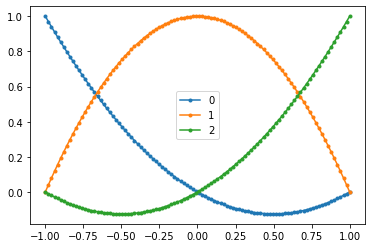

In [15]:
for i in range(3):
    plt.plot(x,F[:,i],'.-',label='{}'.format(i))
plt.legend()